<a href="https://colab.research.google.com/github/gabrielcespedes/01_d_html/blob/main/mini_proyecto_aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive

import pandas as pd #Uso de Data Frames
import matplotlib.pyplot as plt  #Gráficos
import numpy as np  #Cálculos
from sklearn.cluster import KMeans  #Modelo K-Means
import scipy.cluster.hierarchy as shc  #CLustering jerárquico
from sklearn.decomposition import PCA  #Analisis de Componentes Principales
from sklearn.mixture import GaussianMixture  #Modelo de Mezclas Gaussianas
import yellowbrick  #Para gráfico de Silueta
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score  #Índice de Davies Bouldin
import plotly.express as px  #Gráfico 3D

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Análisis y Minería de Datos/data/kmeans1.csv'
file_path_2 = '/content/drive/My Drive/Análisis y Minería de Datos/data/kmeans2.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Implementación y Visualización de K-Means en 2D

In [10]:
data = pd.read_csv(file_path)
data.head()

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209


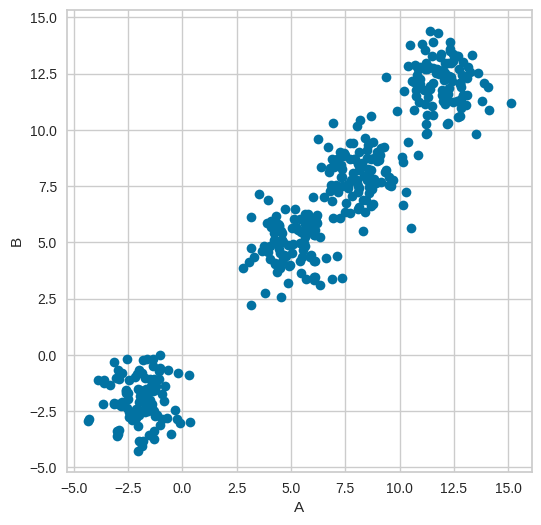

In [11]:
plt.figure(figsize=(6,6))
plt.plot(data['A'],data['B'],'o')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

Podemos visualizar 4 clústers. Tiene una distribución similar (además del "tamaño" o distancia intracluster).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


centroides de los clústers: [[ 5.06877653  4.95259781]
 [11.98408224 12.13107349]
 [-1.92438992 -1.96702231]
 [ 8.20621583  8.08967922]] 



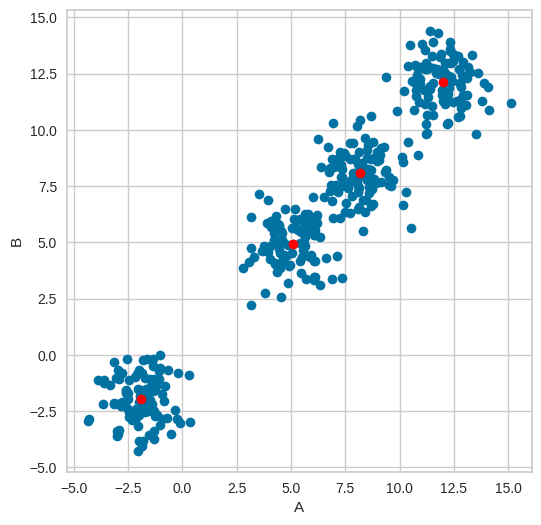

clúster asignado a cada objeto del data: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

intertia (sumatoria distancias al cuadrado al centroide más cercano: 789.001)


In [12]:
#Algoritmo K-Means con 4 clusters. Por ahora no se normalizará data (la magnitud de las variables no es tan alta).
k_means = KMeans(n_clusters = 4)
k_means.fit(data)

print(f"centroides de los clústers: {k_means.cluster_centers_} \n")

plt.figure(figsize=(6,6))
plt.plot(data['A'],data['B'],'o')
plt.xlabel('A')
plt.ylabel('B')
plt.plot(5.07,4.95, 'o', color='red')
plt.plot(11.98,12.13, 'o',color='red')
plt.plot(-1.92,-1.97, 'o',color='red')
plt.plot(8.2,8.09, 'o',color='red')
plt.show()

print(f"clúster asignado a cada objeto del data: {k_means.labels_} \n" )
print(f"intertia (sumatoria distancias al cuadrado al centroide más cercano: {round(k_means.inertia_,3)})")


Normalizaremos data para no tener magnitudes altas en las distancias entre datos y centroides.
Usaremos normalización estándar: $z = \frac{x - \mu}{\sigma} $

In [13]:
data['A'] = (data['A'] - data['A'].mean())/data['A'].std()
data['B'] = (data['B'] - data['B'].mean())/data['B'].std()
data.head()

,A,B
0,-1.704764,-1.743462
1,-1.622245,-1.410065
2,-1.382302,-1.140388
3,-1.697007,-1.773041
4,-1.449857,-1.294108


In [14]:
diccionario = {}
for k in range(1, 11):
    k_means = KMeans(n_clusters=k, max_iter=1000).fit(data)
    diccionario[k] = k_means.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

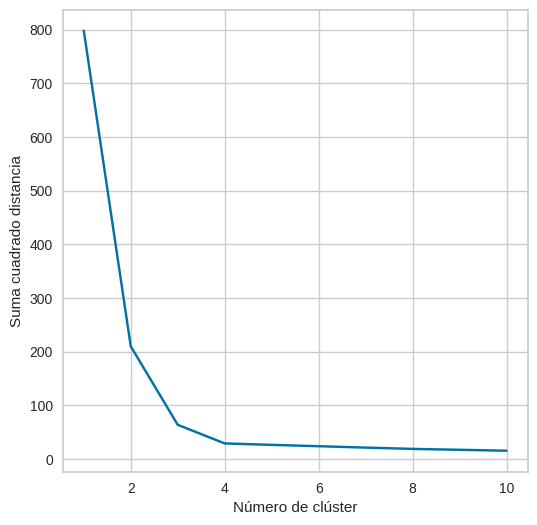

In [15]:
plt.figure(figsize=(6,6))
plt.plot(list(diccionario.keys()), list(diccionario.values()))
plt.xlabel("Número de clúster")
plt.ylabel("Suma cuadrado distancia")
plt.show()

Según el criterio del codo, podrían ser buenas opciones para el n° de clústers 3 o 4. Sin embargo, como para 4 clústers tenemos una distancia intraclúster más pequeña, se optará por esa opción. (De esta forma está mejor limitado qué corresponderá a un clúster, asegurando que no se alejen mucho de un centroide los objetos).

# Análisis de clusters

In [16]:
data2 = pd.read_csv(file_path_2)
data2.head()

,Unnamed: 0,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,1,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,2,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,3,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,4,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


In [17]:
print("Análisis descriptivo de algunos descriptores.\n")
print(f"Amplitude: \n {data2['Amplitude'].describe()} \n")
print(f"AndersonDarling: \n {data2['AndersonDarling'].describe()} \n")
print(f"Autocor_length: \n {data2['Autocor_length'].describe()} \n")
print(f"Gskew: \n {data2['Gskew'].describe()} \n")
print(f"LinearTrend: \n {data2['LinearTrend'].describe()} \n")
print(f"MaxSlope: \n {data2['MaxSlope'].describe()} \n")

Análisis descriptivo de algunos descriptores.

Amplitude: 
 count    5000.000000
mean        0.106905
std         0.147896
min         0.007000
25%         0.021000
50%         0.043500
75%         0.143500
max         1.700500
Name: Amplitude, dtype: float64 

AndersonDarling: 
 count    5000.000000
mean        0.130491
std         0.202838
min         0.000000
25%         0.000016
50%         0.020842
75%         0.185764
max         0.980413
Name: AndersonDarling, dtype: float64 

Autocor_length: 
 count    5000.000000
mean        4.545400
std         6.121163
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        70.000000
Name: Autocor_length, dtype: float64 

Gskew: 
 count    5000.000000
mean        0.016345
std         0.126287
min        -1.763000
25%        -0.004000
50%         0.002500
75%         0.017000
max         1.479000
Name: Gskew, dtype: float64 

LinearTrend: 
 count    5000.000000
mean        0.000001
std         0.000684
m

In [18]:
print("\nRevisión de objetos con descriptores vacíos\n")
for i in data2.columns:
    print(i+': '+ str(data2[i].isnull().sum()))


Revisión de objetos con descriptores vacíos

Unnamed: 0: 0
Amplitude: 0
AndersonDarling: 0
Autocor_length: 0
Beyond1Std: 0
Gskew: 0
LinearTrend: 0
MaxSlope: 0
Mean: 0
Meanvariance: 0
MedianAbsDev: 0
MedianBRP: 0
PercentAmplitude: 0
PeriodLS: 0


In [19]:
data2.fillna(value=data2.mean())  #Imputación
data2=data2.set_index("Unnamed: 0") #Indexaremos data2 por la columna "Unnamed: 0" (evitando que sea descriptor)

Por ahora no aplicaremos reducción de dimensionalidad con PCA. A pesar de que es conveniente debido a la alta dimensionalidad del data. Esto es porque vamos a buscar interpretar a los centroides según el data original.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

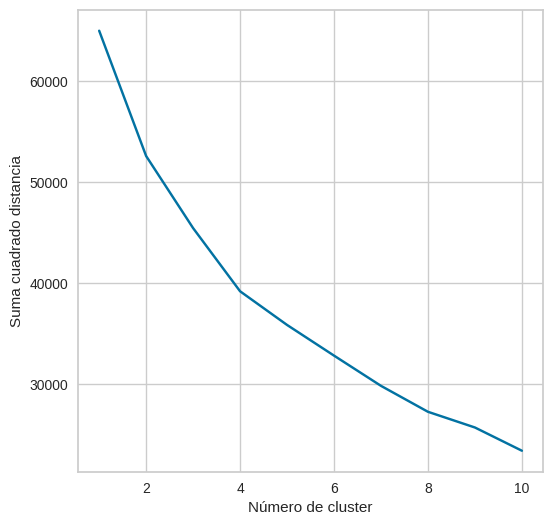

In [20]:
promedio_columna = []
desv_est_columna = []
for i in data2.columns:
    promedio_columna.append(data2[i].mean())  #Guardaremos promedio de cada descriptor para posterior uso
    desv_est_columna.append(data2[i].std())  #Guardaremos desv_est de cada descriptor para posterior uso
    data2[i] = (data2[i] - data2[i].mean())/data2[i].std()  #Normalización Estándar

diccionario2 = {}
for k in range(1, 11):
    k_means = KMeans(n_clusters=k, max_iter=1000).fit(data2)  #Algoritmo K-Means
    diccionario2[k] = k_means.inertia_

plt.figure(figsize=(6,6))
plt.plot(list(diccionario2.keys()), list(diccionario2.values()))
plt.xlabel("Número de cluster")
plt.ylabel("Suma cuadrado distancia")
plt.show()

Notemos que según el criterio del codo, un número de 4 clusters sería adecuado para separar los objetos del data. A pesar de que en N° de clúster = 9 también pareciera haber un codo. Sin embargo, no hay mayor diferencia en la inclinación que va tomando la gráfica para ese punto. Por lo que se decidirá por optar a 4 clústers.

IMPORTANTE: Este Data Set es una de las que hemos estado trabajando, por lo que en realidad tendría sentido trabajar con 9 clusters, ya que los datos corresponden a 9 tipos distintos de estrellas. Sin embargo, se puede asegurar lo anterior, conociendo esa información. Para un problema en que no tengamos a priori etiquetas para estos objetos, podría ser coherente primero trabajar con 4 clusters, y si no hay conformidad con los resultados, pasar a 9 clusters.

In [21]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data2)
centroides = k_means.cluster_centers_
print(f"centroides de los clústers: {centroides} \n")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


centroides de los clústers: [[ 0.79987979 -0.50118168  0.18431659  1.02242934 -0.33432495 -0.01003587
   0.14887551  0.62933049  0.76150407  0.90981215 -1.0635908   0.6161947
  -0.18638305]
 [ 6.28365127 -0.55193521  1.41324106  1.0136059  -1.62881769 -0.79735246
  -0.14857284 -0.58876286  7.34912421  6.98477355 -1.2659265   6.33925044
   0.13343934]
 [ 0.98359258 -0.60182234 -0.40671784 -1.8675456   1.76537221  0.20145751
   0.94907392  1.74981105  0.56361416  0.32777558  1.67284456  1.20661661
  -0.29178448]
 [-0.44032163  0.22499143 -0.02345612 -0.07859726 -0.09676829 -0.01020936
  -0.1565579  -0.38556317 -0.39341805 -0.40168701  0.11785653 -0.41588577
   0.08707367]] 



Revirtamos la normalización anterior: $x = z \cdot \sigma + \mu$

In [22]:
for i in range(0,4):
    for j in range(0,13):
        centroides[i][j] = centroides[i][j]*desv_est_columna[j]+promedio_columna[j]

In [23]:
print(centroides)

[[ 2.25203483e-01  2.88318667e-02  5.67363184e+00  3.79313957e-01
  -2.58756219e-02 -5.74129353e-06  3.57841811e+00  1.61777865e+01
   7.91194129e-03  9.61567164e-02  2.84139425e-01  1.95444368e-02
   1.26762171e+02]
 [ 1.03623039e+00  1.85370980e-02  1.31960784e+01  3.78780784e-01
  -1.89352941e-01 -5.44372549e-04  7.75347980e-01  1.38756257e+01
   4.43247843e-02  4.76598039e-01  2.59309863e-01  1.02469765e-01
   4.28887417e+02]
 [ 2.52373837e-01  8.41806977e-03  2.05581395e+00  2.04681891e-01
   2.39288372e-01  1.38948837e-04  1.11192643e+01  1.82954619e+01
   6.81811163e-03  5.97069767e-02  6.19940233e-01  2.80994698e-02
   2.71930549e+01]
 [ 4.17828685e-02  1.76127705e-01  4.40182129e+00  3.12782394e-01
   4.12464428e-03 -5.85998862e-06  7.00098966e-01  1.42596672e+01
   1.52814912e-03  1.40247581e-02  4.29120364e-01  4.58990637e-03
   3.85087365e+02]]


En el arreglo anterior podemos observar las coordenadas de los centroides para el data inicial (sin normalización). Tenemos 4 filas, que corresponderán a cada centroide (o tipo de clúster) con los valores en los 13 descriptores.
Por ejemplo:

In [24]:
centroides[1][3]

0.3787807843137255

Podemos ver que para los objetos del cluster N° 2 (enumerando desde 1 en adelante), para el descriptor en posición 3, es decir, la variable Beyond1Std, en promedio, su valor corresponde al número anterior.

In [25]:
centroides[2][11]

0.028099469767441862

Podemos ver que para los objetos del clúster N°3, para el descriptor en posición 11, es decir, la variable PercentAmplitude, en promedio su valor corresponde al número anterior.

In [26]:
centroides[3][2]

4.401821286283439

Como último ejemplo podemos ver que para los objetos del último clúster (N°4), en promedio, su valor en Autocor_length es el número anterior.

IMPORTANTE: se puede también revisar el caso de número de clústers = 9, y comparar con los estadísticos para cada tipo de estrella (se ha trabajado anteriormente). Pero habría que cambiar rango en for.

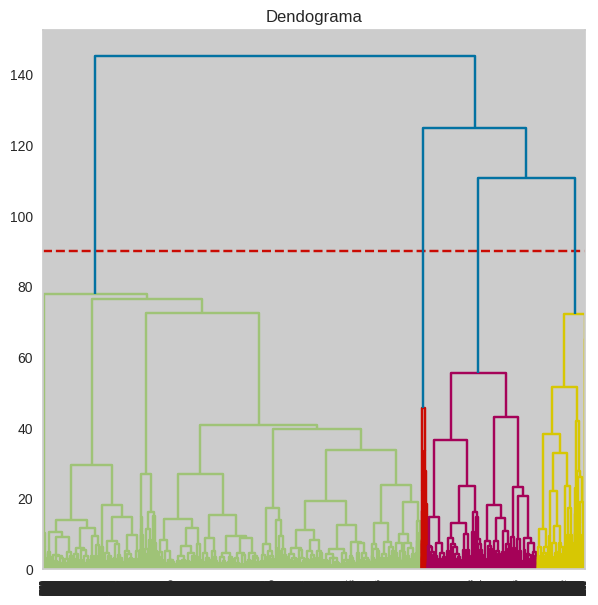

In [27]:
plt.figure(figsize=(7, 7))
plt.title("Dendograma") #Dendograma
plt.axhline(y=90, color='r', linestyle='--')
dendograma = shc.dendrogram(shc.linkage(data2, method='ward'))

Observemos que según el dendograma, una elección de 4 clústers es pertinente. Se graficó una línea horizontal para visualizar mejor la separación de los 4 clústers. (Cada intersección de la línea roja segmentada con las líneas verticales en azul está asociada a un clúster. El eje horizontal representa los distintos datos y el eje vertical la "distancia entre datos y grupos de datos").

IMPORTANTE: Ahora volveremos a realizar algoritmo K-Means pero con reducción de dimensionalidad. Además de comparar resultados con el modelo GMM. Realizaremos esta reducción ya que las métricas de distancia pierden sentido con alta dimensionalidad.

In [28]:
pca = PCA(n_components=3)
data2_transformado = pca.fit_transform(data2)
data2_transformado = pd.DataFrame(data2_transformado, columns = ['C1', 'C2','C3'])
data2_transformado.head()

,C1,C2,C3
0,-1.111869,0.879377,-0.350725
1,2.100288,-1.203624,-1.603944
2,1.786492,3.123273,0.158059
3,3.457597,-1.872389,-0.793762
4,-1.417735,0.128099,0.133326


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

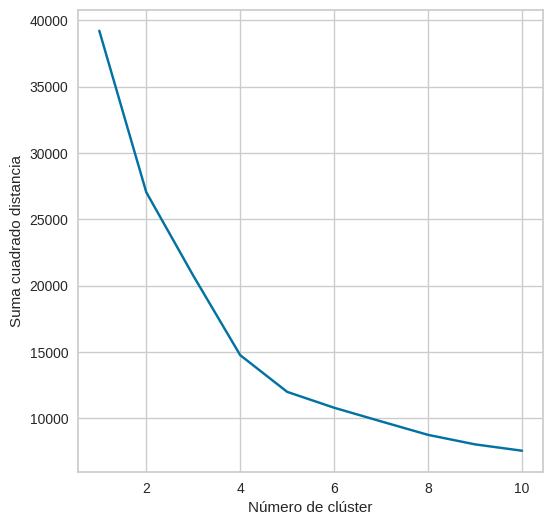

In [29]:
diccionario3 = {}
for k in range(1, 11):
    k_means = KMeans(n_clusters=k, max_iter=1000).fit(data2_transformado)
    diccionario3[k] = k_means.inertia_

plt.figure(figsize=(6,6))
plt.plot(list(diccionario3.keys()), list(diccionario3.values()))
plt.xlabel("Número de clúster")
plt.ylabel("Suma cuadrado distancia")
plt.show()

Al realizar reducción de dimensionalidad, a pesar de que para 4 clústers también se observa un codo, para 5 podría ser una buena opción.

Estudiando sobre el modelo de clustering GMM: Gaussian Mixture Model (Modelo de Mezcla Gaussiana) puedo comentar que se trata de un modelo en el que se asume que cada objeto del data pertenece a una Distribución Gaussiana (de dimensión el N° de descriptores correspondiente). Para la agrupación se utilizan los estadísticos de media y covarianza (matriz de covarianza), separando en grupos con una Distribución Gaussiana determinada.

Con esta distinción notamos una diferencia con el Algoritmo K-Means, el cual no considera en mayor medida la covarianza en los datos. Por ejemplo en 2 o 3 dimensiones, la covarianza nos indica la forma que tiene la distribución de los datos. Podemos hacer la siguiente analogía, el algoritmo K-Means determina los clústers como círculos o esferas (hiperesfera en más dimensiones) con el centro en cada grupo de datos, con el radio definido como la distancia más alta entre este centro (centroide) y los objetos que pertenecen a ese clúster. Pero si la "forma" de estas agrupaciones de datos no son estrictamente "esféricas" pueden haber clústers que incorporan a objetos que no son necesariamente de ese clúster (o grupo con similitudes). En este sentido, el clustering GMM, al considerar covarianza, se ajusta mejor a la forma de los grupos de objetos a los que asignaremos en un clúster.

Otra diferencia, según lo que estuve leyendo en https://towardsdatascience.com/ es que en el algoritmo K-Means, los objetos son asignados a los clústers pero sin guardar cuál es la probabilidad de que efectivamente pertenezca a ese clúster, a diferencia del modelo GMM que si guarda esa información (de hecho la probabilidad de pertenencia a cada grupo).

Revisemos ahora la implementación de GMM. Lo realizaremos con 4 clústers en primera instancia. (Continuaremos con el data normalizado y reducido en su dimensionalidad).

In [30]:
#Implementación del modelo GMM. Similar a K-Means, se necesita definir previamente número de clústers.
gmm = GaussianMixture(n_components=4).fit(data2_transformado)  #Lo implementaremos con 4 clústers en primera instancia
labels=gmm.predict(data2_transformado)  #Predicción de clúster al cual pertenecerá cada objeto del data
labels  #N° de clúster asignado a cada objeto del data

array([1, 2, 0, ..., 1, 2, 1])

Ahora evaluaremos el desempeño de los modelos K-Means y GMM con las métricas de Coherencia (para K-Means) e Índice de Davies-Bouldin

## K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


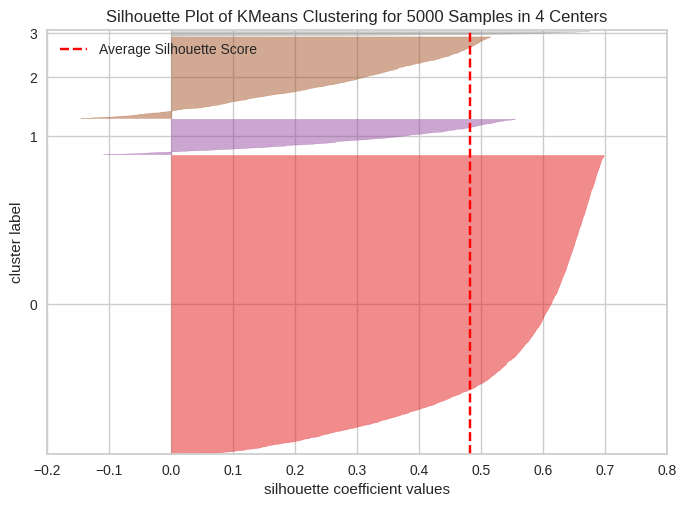

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
k_means = KMeans(n_clusters = 4, random_state=42)
plot = SilhouetteVisualizer(k_means)
plot.fit(data2_transformado)
plot.show()

Se probó con un n° de clústers desde 2 hasta 9 para Modelo K-Means. El caso en el que el indicador de coherencia general para todos los datos fue mayor es con 3 clústers. La segunda mejor opción fue 2 clústers (codo en gráfico anterior) y la tercera mejor opción 4 clústers (la diferencia en la coherencia general del data, para las otras dos elecciones de número de clústers no parece ser tan significativa). Por esta razón, yo descartaría usar 5 clústers (como planteaba gráfico de distancia intracluster anterior). Me inclinaré más por 4 clústers, ya que para 2 clústers, es mucha la distancia intraclusters (se aprecia en gráfico anterior: Distancia intraclusters vs n° de clusters).

In [32]:
for k in range(2,11):
    k_means = KMeans(n_clusters=k, random_state=42).fit(data2_transformado)
    labels = k_means.labels_
    print(str(k)+' clusters')
    index = davies_bouldin_score(data2_transformado, labels)
    print('Davies Bouldin score='+ str(index))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 clusters
Davies Bouldin score=1.1575533103380995
3 clusters
Davies Bouldin score=0.9388464891348427


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 clusters
Davies Bouldin score=0.8228932461973001
5 clusters
Davies Bouldin score=0.8906832817344188


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 clusters
Davies Bouldin score=0.9450485564294424


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 clusters
Davies Bouldin score=1.0410336989993396


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 clusters
Davies Bouldin score=1.0470739571166394


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 clusters
Davies Bouldin score=1.0459269746501758


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 clusters
Davies Bouldin score=1.0081899756082677


Según el Índice de Davies Bouldin, la elección de 4 clústers es la mejor opción (es el menor valor en este índice). Es una buena noticia, tengo más seguridad en la apreciación anterior.

## GMM

In [33]:
for k in range(2,11):
    gmm = GaussianMixture(n_components=k, random_state=42).fit(data2_transformado)
    labels = gmm.predict(data2_transformado)
    print(str(k)+' clusters')
    index = davies_bouldin_score(data2_transformado, labels)
    print('Davies Bouldin score='+ str(index))

2 clusters
Davies Bouldin score=1.4547199034530078
3 clusters
Davies Bouldin score=1.5962850641254531
4 clusters
Davies Bouldin score=1.0763148201348491
5 clusters
Davies Bouldin score=1.0365201417777692
6 clusters
Davies Bouldin score=1.1776623926735297
7 clusters
Davies Bouldin score=1.380897543488555
8 clusters
Davies Bouldin score=1.2714393957429602
9 clusters
Davies Bouldin score=1.4065341549473085
10 clusters
Davies Bouldin score=1.2581762446662028


Para el modelo GMM, según el índice de Davies Bouldin, la mejor elección es usar 5 clústers. (Recordemos que fue un codo usando el algoritmo K-Means.) No realizamos el gráfico de distancia intracluster por clúster para el modelo GMM para no hacer muy extenso el desarrollo de este proyecto. Sin embargo, notemos que el segundo valor más bajo fue con la elección de 4 clústers que ya hemos mencionado.

## Visualización de clústers para ambos modelos (data con reducción de dimensionalidad)

Modelo K-Means

In [34]:
k_means = KMeans(n_clusters=4, random_state=42).fit(data2_transformado)
data2_transformado['label_k_means'] = k_means.labels_
fig = px.scatter_3d(data2_transformado, x='C1', y='C2', z='C3',
              color='label_k_means')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


En la representación anterior, la elección de 4 o 5 clústers parece adecuada. En este caso se están visualizando 4 clústers.

Modelo GMM

In [35]:
gmm = GaussianMixture(n_components=5, random_state=42).fit(data2_transformado)
data2_transformado['label_gmm'] = gmm.predict(data2_transformado)
fig = px.scatter_3d(data2_transformado, x='C1', y='C2', z='C3',
              color='label_gmm')
fig.show()

Para esta representación gráfica, de clústers en el data con dimensión reducida y modelo GMM, creo que es más adecuado usar 5 clústers (como indicaba el índice de Davies Bouldin).

## Conclusión.

Después de optar para trabajar con el data de los datos de estrellas: kmeans2.csv, posterior a la normalización y a la reducción de dimensionalidad, yo optaría por considerar 4 clústers para el modelo K-Means y 5 clústers para el modelo GMM. Si tuviera que optar por una de estas dos opciones de clustering, para este caso particular optaría por K-Means 4 clústers, ya que tiene un menor índice de Davies Bouldin que el caso de GMM 5 clústers. (0.82 vs 1.04).